# 09 — Filtros lineales (Media y Gaussiano)

- **Media**: rápido, sustituye cada píxel por el promedio de sus vecinos.
- **Gaussiano**: suaviza con una función de campana, preserva mejor los bordes que la media.

Ambos son convoluciones (operaciones lineales) y sirven como paso previo a operaciones como detección de bordes, reducción de ruido o preparación de datos para algoritmos de SLAM.


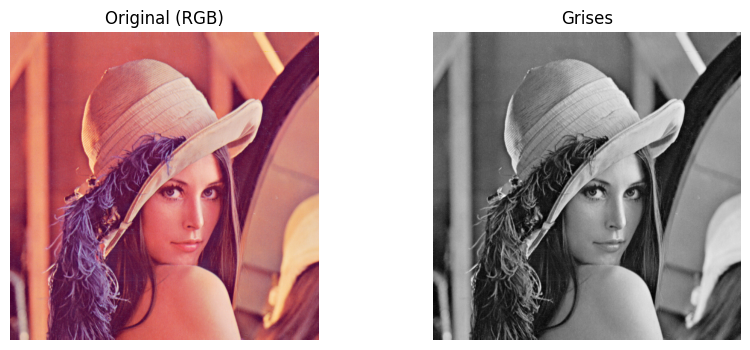

In [1]:
# ✅ Importar librerías y cargar imagen
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = r"C:\Users\rrm21\Documents\Vision_en_Robotica\imagenes\lenna.png"

img_bgr = cv2.imread(IMG_PATH)
if img_bgr is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica IMG_PATH.")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original (RGB)"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(img_gray, cmap="gray"); plt.title("Grises"); plt.axis("off")
plt.show()

## Filtro de Media (Box filter)

Sustituye cada píxel por el promedio de un vecindario. Es muy rápido, pero borra bordes con facilidad.

En OpenCV se implementa con `cv2.blur`


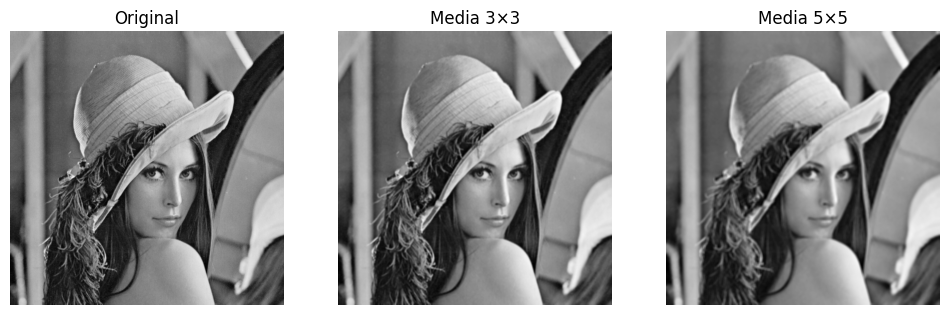

In [2]:
blur3 = cv2.blur(img_gray, (3,3))
blur5 = cv2.blur(img_gray, (5,5))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img_gray, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(blur3, cmap="gray"); plt.title("Media 3×3"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(blur5, cmap="gray"); plt.title("Media 5×5"); plt.axis("off")
plt.show()

## Filtro Gaussiano

Convoluciona la imagen con un kernel Gaussiano. Suaviza sin los artefactos de la media, y preserva mejor los bordes.

En OpenCV: `cv2.GaussianBlur`.


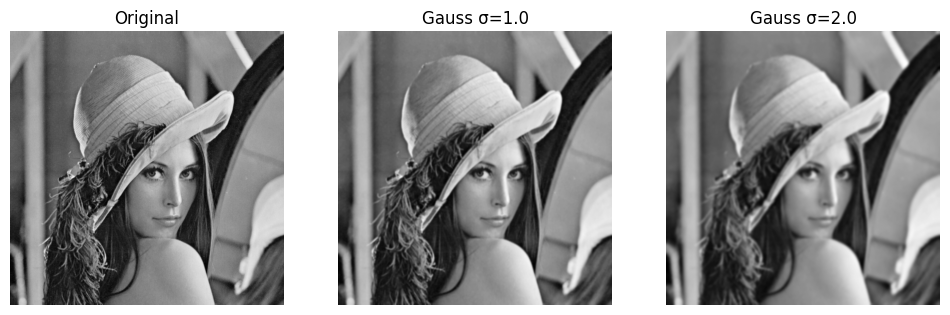

In [3]:
gauss1 = cv2.GaussianBlur(img_gray, (0,0), sigmaX=1.0)
gauss2 = cv2.GaussianBlur(img_gray, (0,0), sigmaX=2.0)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img_gray, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(gauss1, cmap="gray"); plt.title("Gauss σ=1.0"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(gauss2, cmap="gray"); plt.title("Gauss σ=2.0"); plt.axis("off")
plt.show()

## Impacto en detección de bordes

Los filtros lineales se usan mucho antes de detectar bordes para estabilizar gradientes.

Ejemplo: aplicar Canny después de un Gaussiano.


## Notas prácticas en robótica

- **Media**: útil para bajar ruido rápido en sistemas embebidos, aunque degrada bordes. Puede servir para preparar imágenes en tareas donde los detalles finos no son críticos.  
- **Gaussiano**: preferido en visión robótica antes de Canny, Optical Flow o *feature detection*, porque suaviza ruido manteniendo las estructuras importantes.  
- Ambos son fáciles de implementar en hardware acelerado (GPU/FPGA).  
